In [2]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
38493,38493,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0083656,-57.5626231",-38.008366,...,65.0,1676.923077,1676.923077,NaN,3.0,NaN,http://www.properati.com.ar/18l89_venta_depart...,Excelente departamento de 3 ambientes interno ...,Depto. 3 amb. zona Güemes,https://thumbs4.properati.com/9/PW9tmY0YVdmNbs...
91377,91377,sell,PH,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3427504.0,NaN,NaN,...,53.0,2264.150943,2264.150943,NaN,NaN,NaN,http://www.properati.com.ar/1bbhw_venta_ph_vic...,"Muy buen ph 3 amb, 1 piso x escalera, 2 dorm ...",PH en Vicente López,https://thumbs4.properati.com/8/9H6cxmv7ZI4F4-...
81230,81230,sell,apartment,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,NaN,NaN,...,58.0,2318.032787,2437.931034,NaN,NaN,NaN,http://www.properati.com.ar/1axrf_venta_depart...,* Departamento de 2 ambientes a Estrenar con C...,Departamento - Flores,https://thumbs4.properati.com/6/pYfPliKlh5uv8l...
42942,42942,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.8925454,-60.6892734",-32.892545,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18xea_venta_casa_r...,Maza Freyre excepcional Chalet sobre lote 760m...,Maza 2100,https://thumbs4.properati.com/1/SDFFkANRMw3Uns...
79866,79866,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.629417228,-58.452102359",-34.629417,...,30.0,2342.857143,2733.333333,NaN,NaN,NaN,http://www.properati.com.ar/1aw40_venta_depart...,* MONO-AMBIENTE DIVISIBLES. Apto Profesional c...,Departamento - Caballito,https://thumbs4.properati.com/6/gYsrjB1onfTh9t...
28755,28755,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.5883093539,-58.411826071",-34.588309,...,160.0,3000.000000,3618.750000,NaN,4.0,NaN,http://www.properati.com.ar/17x4j_venta_depart...,Excelente 3/4 amb y dep reciclado a nuevo! Coc...,Excelente 3/4 Amb y Dep Reciclado a Nuevo! Coc...,https://thumbs4.properati.com/9/WiFNjYDPOnG-x2...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [4]:
# Columna price_aprox_local_currency: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_aprox_local_currency.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_local_currency.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_local_currency']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_local_currency  count
0                    0.000000e+00      1
1                    8.234017e+04      1
2                    8.738350e+04      1
3                    8.822250e+04      2
4                    8.906114e+04      5
...                           ...    ...
10359                2.823120e+08      1
10360                3.440678e+08      1
10361                4.054773e+08      1
10362                4.411125e+08      1
10363                8.212711e+08      1

[10364 rows x 2 columns]


<AxesSubplot:xlabel='property_type'>

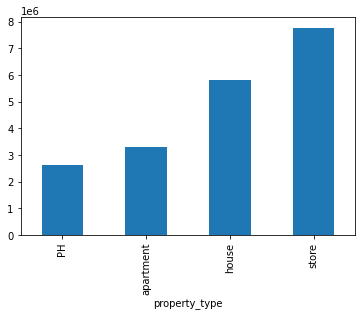

In [5]:
#graficamos el dato por tipo de propiedad con el fin de observar los rangos de precios. Sin embargo vemos que hay unos valores muy altos lo que eleva la dimensión del eje y a numeros exponenciales.
data.groupby('property_type')['price_aprox_local_currency'].mean().plot.bar()

In [6]:
data.price_aprox_local_currency.describe()

count    1.008100e+05
mean     4.229397e+06
std      6.904714e+06
min      0.000000e+00
25%      1.583309e+06
50%      2.558452e+06
75%      4.675792e+06
max      8.212711e+08
Name: price_aprox_local_currency, dtype: float64

Detalle de análisis de columnas:
* `price_aprox_local_currency` -> Esta columna tiene 20.410 datos nulos o su equivalente 16,83%. Consideramos que esta variable es relevante para la proyección, observamos un valor máximo de 821.271.104 alejado significativamente de la media que es de 4.229.397.

Esta columna podriamos completarla Multiplicando el precio en dolares que se logre rellenar por la tasa de cambio empleada que en este caso es de 17.6445 pesos argentinos por dolar. (valor calculado al dividir price_aprox_local_currency entre price_aprox_usd)


### Detalle de valores extremos en la  columna `price_aprox_local_currency`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencias valores muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

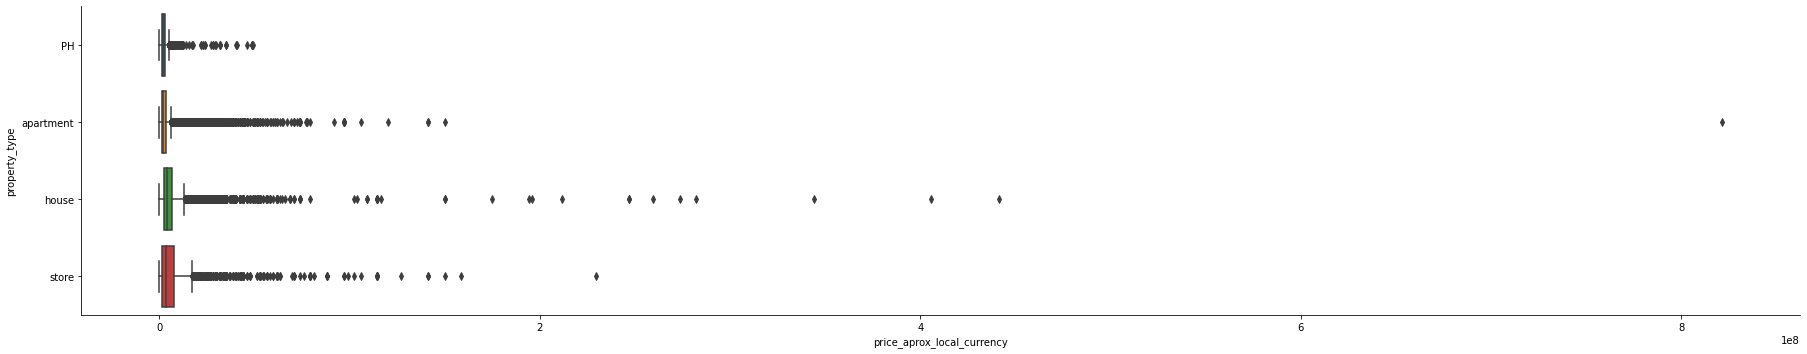

In [7]:
sns.catplot(data=data, x= 'price_aprox_local_currency', y="property_type", kind="box", height=5, aspect=5,)

### Regex para rellenar la columna `price_aprox_local_currency`:

Vamos a extraer datos de las columnas title y description

In [8]:
# Buscamos precio aproximado en moneda local en los titulos y en la descripción
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

#Valor minimo en moneda local $82.340 pesos argentinos, trae pesos con los simbolos tambien? cómo quitariamos los simbolos y los . o cambiamos los . por ,

patron = r'[$]([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)'

regex = re.compile(patron, flags = re.IGNORECASE)

precio_aprox_local_currency_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_local_currency'].fillna(precio_aprox_local_currency_titulo, inplace=True)

precio_aprox_local_currency_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_local_currency'].fillna(precio_aprox_local_currency_descripcion, inplace=True)


In [9]:
#Al aplicar regex a la columna, se lograron reducir los nan pasando del 16.83% al 13.62%. 
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_local_currency.isna().sum()/data.price_aprox_local_currency.shape[0]*100}')
print (f'entradas: {data.price_aprox_local_currency.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 13.620689655172413
entradas: 121220


In [12]:
#Vamos a transformar los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['price_aprox_local_currency'] = pd.to_numeric(data['price_aprox_local_currency'],errors = 'coerce')
data['price_aprox_local_currency'].notnull().sum()

101064

In [15]:
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_local_currency.isna().sum()/data.price_aprox_local_currency.shape[0]*100}')
print (f'entradas: {data.price_aprox_local_currency.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 16.627619204751692
entradas: 121220
